# Observables

In [1]:
import warnings
import matplotlib
from IPython.core.display import Markdown
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from squlearn.encoding_circuit import YZ_CX_EncodingCircuit
from squlearn.observables import SummedPaulis, SummedProbabilities, IsingHamiltonian, CustomObservable
from observables import SummedNeighbours, SummedPairs, SummedSingles
from utils.encoding_circuits import get_measurement_circuits
from utils.observables import get_pauli_sum

In [2]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
%matplotlib inline

In [3]:
warnings.filterwarnings("ignore")

In [4]:
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=42, stratify=y)

In [5]:
num_qubits = 5

### Summed Paulis

In [6]:
display(Markdown("<br>".join(get_pauli_sum(observable) for observable in [
    SummedPaulis(num_qubits=num_qubits, op_str="X"),
    SummedPaulis(num_qubits=num_qubits, op_str="Y"),
    SummedPaulis(num_qubits=num_qubits, op_str="Z"),
    SummedPaulis(num_qubits=num_qubits, op_str=("X", "Y")),
    SummedPaulis(num_qubits=num_qubits, op_str=("X", "Z")),
    SummedPaulis(num_qubits=num_qubits, op_str=("Y", "Z")),
    SummedPaulis(num_qubits=num_qubits, op_str=("X", "Y", "Z"))
])))

IIIII + IIIIX + IIIXI + IIXII + IXIII + XIIII<br>IIIII + IIIIY + IIIYI + IIYII + IYIII + YIIII<br>IIIII + IIIIZ + IIIZI + IIZII + IZIII + ZIIII<br>IIIII + IIIIX + IIIXI + IIXII + IXIII + XIIII + IIIIY + IIIYI + IIYII + IYIII + YIIII<br>IIIII + IIIIX + IIIXI + IIXII + IXIII + XIIII + IIIIZ + IIIZI + IIZII + IZIII + ZIIII<br>IIIII + IIIIY + IIIYI + IIYII + IYIII + YIIII + IIIIZ + IIIZI + IIZII + IZIII + ZIIII<br>IIIII + IIIIX + IIIXI + IIXII + IXIII + XIIII + IIIIY + IIIYI + IIYII + IYIII + YIIII + IIIIZ + IIIZI + IIZII + IZIII + ZIIII

### Summed Probabilities

In [7]:
display(Markdown(get_pauli_sum(SummedProbabilities(num_qubits=num_qubits))))

IIIII + IIIII + IIIIZ + IIIII + IIIZI + IIIII + IIZII + IIIII + IZIII + IIIII + ZIIII

### Ising Hamiltonian

In [8]:
display(Markdown(get_pauli_sum(IsingHamiltonian(num_qubits=num_qubits))))

IIIII + IIIIZ + IIIZI + IIZII + IZIII + ZIIII + IIIZZ + IIZIZ + IIZZI + IZIIZ + IZIZI + IZZII + ZIIIZ + ZIIZI + ZIZII + ZZIII

### Summed Singles

In [9]:
display(Markdown("<br>".join(get_pauli_sum(observable) for observable in [
    SummedSingles(num_qubits=num_qubits, bases=["X", "Y", "Z"], seed=23_04_1858),  # Planck
    SummedSingles(num_qubits=num_qubits, bases=["X", "Y", "Z"], seed=14_03_1879),  # Einstein
    SummedSingles(num_qubits=num_qubits, bases=["X", "Y", "Z"], seed=12_08_1887),  # Schrödinger
    SummedSingles(num_qubits=num_qubits, bases=["X", "Y", "Z"], seed=25_04_1900),  # Pauli
    SummedSingles(num_qubits=num_qubits, bases=["X", "Y", "Z"], seed=5_12_1901),  # Heisenberg
])))

XIIII + IZIII + IIYII + IIIYI + IIIIY + IIIII<br>ZIIII + IZIII + IIXII + IIIYI + IIIIY + IIIII<br>YIIII + IZIII + IIXII + IIIYI + IIIIZ + IIIII<br>ZIIII + IZIII + IIYII + IIIZI + IIIIY + IIIII<br>ZIIII + IYIII + IIXII + IIIYI + IIIIY + IIIII

### Summed Neighbours

In [10]:
display(Markdown("<br>".join(get_pauli_sum(observable) for observable in [
    SummedNeighbours(num_qubits=num_qubits, bases=["X"]),
    SummedNeighbours(num_qubits=num_qubits, bases=["Y"]),
    SummedNeighbours(num_qubits=num_qubits, bases=["Z"]),
    SummedNeighbours(num_qubits=num_qubits, bases=["X", "Y", "Z"], seed=23_04_1858),  # Planck
    SummedNeighbours(num_qubits=num_qubits, bases=["X", "Y", "Z"], seed=14_03_1879),  # Einstein
    SummedNeighbours(num_qubits=num_qubits, bases=["X", "Y", "Z"], seed=12_08_1887),  # Schrödinger
    SummedNeighbours(num_qubits=num_qubits, bases=["X", "Y", "Z"], seed=25_04_1900),  # Pauli
    SummedNeighbours(num_qubits=num_qubits, bases=["X", "Y", "Z"], seed=5_12_1901),  # Heisenberg
])))

XXIII + IXXII + IIXXI + IIIXX + IIIII<br>YYIII + IYYII + IIYYI + IIIYY + IIIII<br>ZZIII + IZZII + IIZZI + IIIZZ + IIIII<br>XZIII + IYYII + IIYZI + IIIZX + IIIII<br>ZZIII + IXYII + IIYYI + IIIXX + IIIII<br>YZIII + IXYII + IIZZI + IIIXX + IIIII<br>ZZIII + IYZII + IIYYI + IIIZX + IIIII<br>ZYIII + IXYII + IIYZI + IIIYZ + IIIII

### Summed Pairs

In [11]:
display(Markdown("<br>".join(get_pauli_sum(observable) for observable in [
    SummedPairs(num_qubits=num_qubits, bases=["X"]),
    SummedPairs(num_qubits=num_qubits, bases=["Y"]),
    SummedPairs(num_qubits=num_qubits, bases=["Z"]),
    SummedPairs(num_qubits=num_qubits, bases=["X", "Y", "Z"], seed=23_04_1858),  # Planck
    SummedPairs(num_qubits=num_qubits, bases=["X", "Y", "Z"], seed=14_03_1879),  # Einstein
    SummedPairs(num_qubits=num_qubits, bases=["X", "Y", "Z"], seed=12_08_1887),  # Schrödinger
    SummedPairs(num_qubits=num_qubits, bases=["X", "Y", "Z"], seed=25_04_1900),  # Pauli
    SummedPairs(num_qubits=num_qubits, bases=["X", "Y", "Z"], seed=5_12_1901),  # Heisenberg
])))

XXIII + XIXII + XIIXI + XIIIX + IXXII + IXIXI + IXIIX + IIXXI + IIXIX + IIIXX + IIIII<br>YYIII + YIYII + YIIYI + YIIIY + IYYII + IYIYI + IYIIY + IIYYI + IIYIY + IIIYY + IIIII<br>ZZIII + ZIZII + ZIIZI + ZIIIZ + IZZII + IZIZI + IZIIZ + IIZZI + IIZIZ + IIIZZ + IIIII<br>XZIII + YIYII + YIIZI + ZIIIX + IZYII + IYIYI + IYIIY + IIZZI + IIYIZ + IIIXZ + IIIII<br>ZZIII + XIYII + YIIYI + XIIIX + IXXII + IYIXI + IYIIY + IIXXI + IIXIY + IIIYY + IIIII<br>YZIII + XIYII + ZIIZI + XIIIX + IZXII + IXIXI + IZIIZ + IIYYI + IIYIY + IIIYX + IIIII<br>ZZIII + YIZII + YIIYI + ZIIIX + IZYII + IXIXI + IZIIY + IIXYI + IIYIY + IIIXY + IIIII<br>ZYIII + XIYII + YIIZI + YIIIZ + IYZII + IXIZI + IZIIZ + IIYXI + IIXIZ + IIIYY + IIIII

### Add Measurements to the Encoding Circuit

To evaluate a given observable, the encoding circuit must be extended with specific measurement gates. Since we can only measure the $Z$ basis, we must apply a basis transformation before the measurement occurs:

$\langle \psi | X | \psi \rangle = \langle \psi | H Z H | \psi \rangle$

$\langle \psi | Y | \psi \rangle =  \langle \psi | S H Z H S^\dagger | \psi \rangle$

$\langle \psi | Z | \psi \rangle = \langle \psi | Z | \psi \rangle$

These extra gates need to be taken into account when evaluating the encoding circuit and observable to use. Also, since a qubit cannot be measured in multiple bases simultaneously, observables with differing basis requirements must be evaluated through separate circuit executions, which is even more increasing the amount of gates required. The following example will illustrate this:

In [12]:
encoding_circuit = YZ_CX_EncodingCircuit(
    num_qubits=3,
    num_features=3,
    num_layers=1,
)
custom_observable = CustomObservable(
    num_qubits=encoding_circuit.num_qubits,
    operator_string=["XII", "IZI", "ZYI"],
)

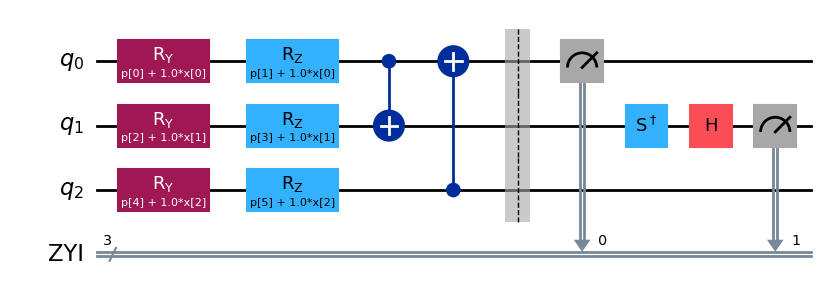

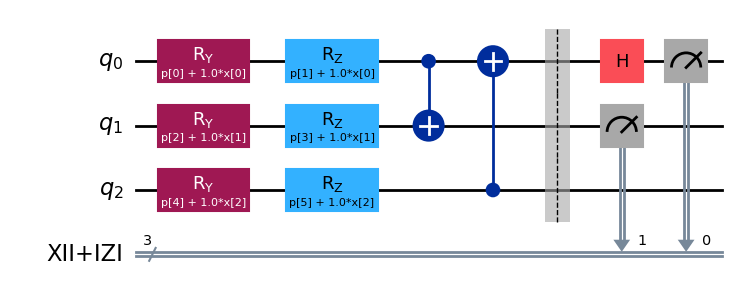

In [13]:
for measurement_circuit in get_measurement_circuits(
        encoding_circuit=encoding_circuit,
        observable=custom_observable,
        backend=None,
):
    measurement_circuit.draw("mpl")

The measurements required for the observable $XII + IZI + ZYI$ are executed in two different circuits.